In [ ]:
This model is produced to explore the LSTM and bidirectional LSTM.

Setup and Resources:
1. This experiment model could be operated in Colab (https://colab.research.google.com/notebooks/intro.ipynb).
2. This model could also be executed in the environment installed Python 2 or Python 3; Keras (at least v2.0.4); TensorFlow(at least v1.1.0); scikit-learn; Pandas; Numpy; Matplotlib.

# **Part Ⅰ: Modelling LSTM and Bidirectional LSTM**

Model_1: A sample of LSTM

In [17]:
from random import random
from numpy import array
from numpy import cumsum
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import TimeDistributed

# Sequence classification with the parameter N_TS: number of timesteps
def Seq(N_TS):
	# A sequence generated randomly within [0,1]
  # I as input
	I = array([random() for _ in range(N_TS)])
	# Threshold value for classes
	Threshold = N_TS/5.0
	# Outcome classification for each timestep in a cumulative sequence, the class is 0 from the start, 
  # when the cumulative sum reaches threshold, the output classificaton changes from 0 to 1.
  # And cumsum() is a cumulative sum function returned in a sequence
	O = array([0 if x < Threshold else 1 for x in cumsum(I)])
	# Reshape as 3-dimensional input for LSTM as (Sample, Timesteps, Features)
	I = I.reshape(1, N_TS, 1)
	O = O.reshape(1, N_TS, 1)
	return I, O

# Define number of timesteps as 20
N_TS = 20

# Model 1: Define LSTM
# Build model by using imported Sequential() and add each layer step by step
model_1 = Sequential()
# Define 20 memory units, the input shape as number of timesteps
model_1.add(LSTM(20, input_shape=(N_TS, 1), return_sequences=True))
# Define TimeDistributed wrapper layer for predicting one value per timestep, a sigmoid function to activate
model_1.add(TimeDistributed(Dense(1, activation='sigmoid')))
# Because this model is a binary method for classifying two classes:
# Define binary_crossentropy, optimizer as ADAM and Accuracy for evaluatoin.
model_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the model for 800 times
for epoch in range(800):
	# Generate a random sequence each epoch
	S,O = Seq(N_TS)
	# Use fit() for every sequence
	model_1.fit(S, O, epochs=1, batch_size=1, verbose=2)

# Evaluation
S,O = Seq(N_TS)
# Predict the class
Pre = model_1.predict_classes(S, verbose=0)
# Compared with classification
for i in range(N_TS):
	print('Expected:', O[0, i], 'Predicted', Pre[0, i])

1/1 - 0s - loss: 0.7157 - accuracy: 0.2500
1/1 - 0s - loss: 0.7121 - accuracy: 0.2500
1/1 - 0s - loss: 0.6946 - accuracy: 0.3500
1/1 - 0s - loss: 0.6981 - accuracy: 0.3500
1/1 - 0s - loss: 0.6901 - accuracy: 0.5500
1/1 - 0s - loss: 0.6871 - accuracy: 0.7000
1/1 - 0s - loss: 0.6854 - accuracy: 0.8000
1/1 - 0s - loss: 0.6853 - accuracy: 0.7500
1/1 - 0s - loss: 0.6800 - accuracy: 0.9000
1/1 - 0s - loss: 0.6772 - accuracy: 0.8500
1/1 - 0s - loss: 0.6734 - accuracy: 0.9000
1/1 - 0s - loss: 0.6747 - accuracy: 0.7500
1/1 - 0s - loss: 0.6668 - accuracy: 0.7500
1/1 - 0s - loss: 0.6841 - accuracy: 0.5000
1/1 - 0s - loss: 0.6719 - accuracy: 0.6000
1/1 - 0s - loss: 0.6772 - accuracy: 0.5000
1/1 - 0s - loss: 0.6495 - accuracy: 0.7500
1/1 - 0s - loss: 0.6461 - accuracy: 0.7500
1/1 - 0s - loss: 0.6473 - accuracy: 0.7000
1/1 - 0s - loss: 0.6371 - accuracy: 0.7500
1/1 - 0s - loss: 0.6705 - accuracy: 0.5000
1/1 - 0s - loss: 0.6399 - accuracy: 0.6500
1/1 - 0s - loss: 0.6487 - accuracy: 0.5500
1/1 - 0s - 

Model_2: A sample of bidirectional LSTM

In [18]:
from random import random
from numpy import array
from numpy import cumsum
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.layers import Bidirectional

# Building Senquence function is the same as the method in Model_1

# Sequence classification with the parameter N_TS: number of timesteps
def Seq(N_TS):
	# A sequence generated randomly within [0,1]
  # I as input
	I = array([random() for _ in range(N_TS)])
	# Threshold value for classes
	Threshold = N_TS/5.0
	# Outcome classification for each timestep in a cumulative sequence, the class is 0 from the start, 
  # when the cumulative sum reaches threshold, the output classificaton changes from 0 to 1.
  # And cumsum() is a cumulative sum function returned in a sequence
	O = array([0 if x < Threshold else 1 for x in cumsum(I)])
	# Reshape as 3-dimensional input for LSTM as (Sample, Timesteps, Features)
	I = I.reshape(1, N_TS, 1)
	O = O.reshape(1, N_TS, 1)
	return I, O

# Define number of timesteps as 20
N_TS = 20

# Model 2: Define Bidirectional-LSTM
# Build model by using imported Sequential() and add each layer step by step;
# The difference of two models is adding the Bidirectional layer
model_2 = Sequential()
# Use Bidirectional: Define 20 memory units, the input shape as number of timesteps
model_2.add(Bidirectional(LSTM(20, input_shape=(N_TS, 1), return_sequences=True)))
# Define TimeDistributed wrapper layer for predicting one value per timestep, a sigmoid function to activate
model_2.add(TimeDistributed(Dense(1, activation='sigmoid')))
# Because this model is a binary method for classifying two classes:
# Define binary_crossentropy, optimizer as ADAM and Accuracy for evaluatoin.
model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the model for 800 times
for epoch in range(800):
	# Generate a random sequence each epoch
	S,O = Seq(N_TS)
	# Use fit() for every sequence
	model_2.fit(S, O, epochs=1, batch_size=1, verbose=2)

# Evaluation
S,O = Seq(N_TS)
# Predict the class
Pre = model_2.predict_classes(S, verbose=0)
# Compared with classification
for i in range(N_TS):
	print('Expected:', O[0, i], 'Predicted', Pre[0, i])

1/1 - 0s - loss: 0.6938 - accuracy: 0.3500
1/1 - 0s - loss: 0.6914 - accuracy: 0.4000
1/1 - 0s - loss: 0.6874 - accuracy: 0.6500
1/1 - 0s - loss: 0.6849 - accuracy: 0.8000
1/1 - 0s - loss: 0.6820 - accuracy: 0.9000
1/1 - 0s - loss: 0.6766 - accuracy: 0.8500
1/1 - 0s - loss: 0.6772 - accuracy: 0.6500
1/1 - 0s - loss: 0.6728 - accuracy: 0.6500
1/1 - 0s - loss: 0.6625 - accuracy: 0.7000
1/1 - 0s - loss: 0.6636 - accuracy: 0.6000
1/1 - 0s - loss: 0.6469 - accuracy: 0.7000
1/1 - 0s - loss: 0.6581 - accuracy: 0.6000
1/1 - 0s - loss: 0.6881 - accuracy: 0.4500
1/1 - 0s - loss: 0.6273 - accuracy: 0.8000
1/1 - 0s - loss: 0.6256 - accuracy: 0.8000
1/1 - 0s - loss: 0.6314 - accuracy: 0.7000
1/1 - 0s - loss: 0.6411 - accuracy: 0.6000
1/1 - 0s - loss: 0.6308 - accuracy: 0.6500
1/1 - 0s - loss: 0.6476 - accuracy: 0.5500
1/1 - 0s - loss: 0.6530 - accuracy: 0.5500
1/1 - 0s - loss: 0.5858 - accuracy: 0.8000
1/1 - 0s - loss: 0.6003 - accuracy: 0.7000
1/1 - 0s - loss: 0.6303 - accuracy: 0.6000
1/1 - 0s - 

# **Part Ⅱ: Comparison between LSTM and bidirectional LSTM**

Compare LSTM, LSTM in the oppossite direction, and Bidirectional LSTM

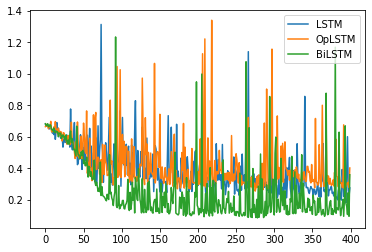

In [19]:
from random import random
from numpy import array
from numpy import cumsum
from matplotlib import pyplot
from pandas import DataFrame
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.layers import Bidirectional

# Sequence classification with the parameter N_TS: number of timesteps
def Seq(N_TS):
	# A sequence generated randomly within [0,1]
  # I as input
	I = array([random() for _ in range(N_TS)])
	# Threshold value for classes
	Threshold = N_TS/5.0
	# Outcome classification for each timestep in a cumulative sequence, the class is 0 from the start, 
  # when the cumulative sum reaches threshold, the output classificaton changes from 0 to 1.
  # And cumsum() is a cumulative sum function returned in a sequence
	O = array([0 if x < Threshold else 1 for x in cumsum(I)])
	# Reshape as 3-dimensional input for LSTM as (Sample, Timesteps, Features)
	I = I.reshape(1, N_TS, 1)
	O = O.reshape(1, N_TS, 1)
	return I, O

# Build LSTM function for forward or backward sequence
def Model_LSTM(N_TS, backwards):
	model = Sequential()
	# Define go_backwards
	model.add(LSTM(20, input_shape=(N_TS, 1), return_sequences=True, go_backwards=backwards))
	model.add(TimeDistributed(Dense(1, activation='sigmoid')))
	model.compile(loss='binary_crossentropy', optimizer='adam')
	return model

# Build Bidirectional function, set the merge mode as parameter
def Model_Bi(N_TS):
	model=Sequential()
	model.add(Bidirectional(LSTM(20, input_shape=(N_TS, 1), return_sequences=True)))
	model.add(TimeDistributed(Dense(1, activation='sigmoid')))
	model.compile(loss='binary_crossentropy', optimizer='adam')
	return model

# Training model and store the loss in every epoch, return a list of loss values after the model fits for comparison
def Model_Train(model, N_TS):
	loss = list()
	for _ in range(400):
		# generate new random sequence
		S,O = Seq(N_TS)
		# fit model for one epoch on this sequence
		hist = model.fit(S, O, epochs=1, batch_size=1, verbose=0)
		loss.append(hist.history['loss'][0])
	return loss


# Define the number of timesteps as 20
N_TS = 10

# Comparison
Comp = DataFrame()
# Return loss value of LSTM by setting the go_backwards as False
Loss_LSTM = Model_LSTM(N_TS, False)
Comp['LSTM'] = Model_Train(Loss_LSTM, N_TS)
# Return loss value of LSTM in the opposite direction by setting the go_backwards as True
Loss_Opposite = Model_LSTM(N_TS, True)
Comp['OpLSTM'] = Model_Train(Loss_Opposite, N_TS)
# Return loss value of Bidirectional LSTM, set the merge mode as
Loss_Bi = Model_Bi(N_TS)
Comp['BiLSTM'] = Model_Train(Loss_Bi, N_TS)
# Plot comparison
Comp.plot()
pyplot.show()